In [4]:
import numpy as np
import matplotlib.pyplot as plt
import adaptivealgo.cli.policy_iter as pi
import adaptivealgo.cli.simulate_policy as sim
from adaptivealgo.lib.simulator import Simulator

In [54]:
n_links = 5
f_thresh = 0.4
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.2
tol = 1e-6

n_episodes = 10000

policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(f"Policy iteration took {i} iterations")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {int(np.mean(samples))} seconds")

Policy iteration took 3 iterations
Mean runtime: 81 seconds


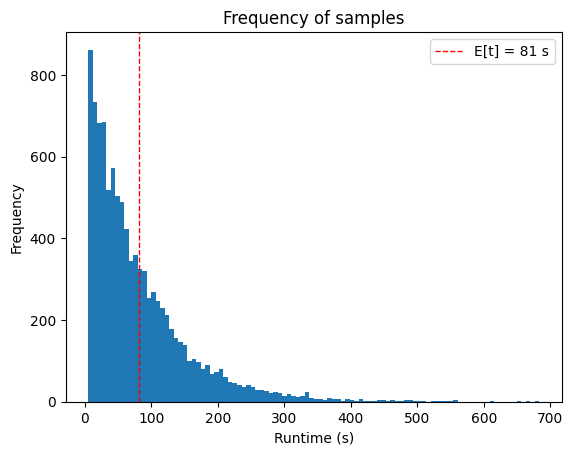

In [55]:
plt.hist(samples, bins=100)
plt.axvline(np.mean(samples), color='r', linestyle='--', linewidth=1)
plt.title('Frequency of samples')
plt.xlabel('Runtime (s)')
plt.ylabel('Frequency')
plt.legend([f'E[t] = {int(np.mean(samples))} s'])
plt.show()